# Analysis of City 311 data

This notebook will have the analysis of the city 311 data I have downloaded.  In the previous notebook I split the data into different years because the New York city data, in particular, was very large (> 6 GB).  Even after splitting it, the NYC data files are o the order of 1 GB in size.

To begin with, I will just use the 2015 data, as these are the smallest (as we're only in September), yet they still contain plenty of statistics.

To begin with, I will import my usual imports.

In [1]:
import numpy as np
import pandas as pd
from dateutil import parser

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams 
%matplotlib inline

Now let's look at a directory listing.

In [2]:
!ls -alrt

total 1798408
drwxr-xr-x+  4 macl2  staff        136 Sep  4 08:26 ..
-rw-r--r--+  1 macl2  staff  859090191 Sep  5 11:53 NYC_311_2015.csv
-rw-r--r--+  1 macl2  staff   53573676 Sep  5 11:56 SF_311_2015.csv
-rw-r--r--+  1 macl2  staff      97976 Sep  5 11:56 DI_Project_311_Intro.ipynb
drwxr-xr-x+  4 macl2  staff        136 Sep  5 14:00 .ipynb_checkpoints
drwxr-xr-x+ 11 macl2  staff        374 Sep  6 19:28 MAPS
-rw-r--r--@  1 macl2  staff      55060 Sep  6 20:15 NYC_light_600x400.jpg
-rw-r--r--@  1 macl2  staff      66911 Sep  6 20:27 NYC_light_600x400.png
-rw-r--r--@  1 macl2  staff      79335 Sep  6 22:05 NYC_dark_600x400.png
-rw-r--r--@  1 macl2  staff      73252 Sep  6 22:05 NYC_dark_600x400.jpg
-rw-r--r--@  1 macl2  staff      73252 Sep  6 22:11 NYC_dark_600x400_2.jpg
-rw-r--r--@  1 macl2  staff      79335 Sep  6 22:11 NYC_dark_600x400_2.png
-rw-r--r--@  1 macl2  staff      97700 Sep  6 22:19 NYC_light_600x400_2.jpg
-rw-r--r--@  1 macl2  staff      49318 Sep  6 22:23 NYC_light_600x4

OK, now I will donwload he SF and NYC 2015 data into separate pandas dataFrames.

In [3]:
dfSF2015 = pd.read_csv("SF_311_2015.csv")
dfNYC2015 = pd.read_csv("NYC_311_2015.csv")

/Users/macl2/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (9,18,41,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


Let's take a look at the head of each dataframe to remind myself of the columns.

In [4]:
dfSF2015.head()

Unnamed: 0  ﻿CaseID                  Opened Closed                 Updated  \
0           0  5053259  09/01/2015 12:40:40 AM    NaN  09/01/2015 01:48:00 AM   
1           1  5053240  09/01/2015 12:16:03 AM    NaN  09/01/2015 12:16:56 AM   
2           2  5053238  09/01/2015 12:15:05 AM    NaN  09/01/2015 12:16:17 AM   
3           3  5053232  09/01/2015 12:11:54 AM    NaN  09/01/2015 12:11:54 AM   
4           4  5053230  09/01/2015 12:10:10 AM    NaN  09/01/2015 12:11:53 AM   

  Status             Responsible Agency                      Category  \
0   Open                  DPW Ops Queue  Street and Sidewalk Cleaning   
1   Open         PUC Streetlights Queue                  Streetlights   
2   Open                  DPW BSM Queue              General Requests   
3   Open                  DPW Ops Queue  Street and Sidewalk Cleaning   
4   Open  PG and E - Streetlights Queue                  Streetlights   

                      Request Type                  Request Details  \
0                 General Cleaning              Other Loose Garbage   
1    Streetlight - Light_Burnt_Out  Light_Burnt_Out on Unknown Pole   
2  dpw - bsm - request_for_service  dpw - bsm - request_for_service   
3                 General Cleaning              Other Loose Garbage   
4    Streetlight - Light_Burnt_Out   Light_Burnt_Out on Wooden Pole   

                                    Address  Supervisor District  \
0   847 HOWARD ST, SAN FRANCISCO, CA, 94103                    6   
1   Intersection of GEARY BLVD and 11TH AVE                    1   
2    Intersection of 14TH ST and MISSION ST                    9   
3  4258 FOLSOM ST, SAN FRANCISCO, CA, 94110                    9   
4    Intersection of 7TH AVE and CLEMENT ST                    1   

      Neighborhood                                  Point    Source  \
0  South of Market   (37.782400819766, -122.403720096779)  Voice In   
1   Inner Richmond  (37.7807685929075, -122.469627013052)  Voice In   
2          Mission  (37.7682735201071, -122.419981393661)   Open311   
3   Bernal Heights   (37.733733034976, -122.413866639816)   Open311   
4   Inner Richmond  (37.7828909363383, -122.465492275341)  Voice In   

                                           Media URL  Year  
0                                                NaN  2015  
1                                                NaN  2015  
2  http://mobile311.sfgov.org/media/san_francisco...  2015  
3  http://mobile311.sfgov.org/media/san_francisco...  2015  
4                                                NaN  2015

In [5]:
dfNYC2015.head()

Unnamed: 0  Unique Key            Created Date             Closed Date  \
0           0    31438770  09/02/2015 02:12:54 AM  09/02/2015 02:32:37 AM   
1           1    31440770  09/02/2015 02:09:15 AM  09/02/2015 02:25:13 AM   
2           2    31442154  09/02/2015 02:02:47 AM                     NaN   
3           3    31436693  09/02/2015 02:02:29 AM  09/02/2015 02:42:08 AM   
4           4    31440646  09/02/2015 02:01:04 AM                     NaN   

  Agency                              Agency Name           Complaint Type  \
0   NYPD          New York City Police Department  Noise - Street/Sidewalk   
1   NYPD          New York City Police Department          Illegal Parking   
2   NYPD          New York City Police Department  Noise - Street/Sidewalk   
3   NYPD          New York City Police Department          Noise - Vehicle   
4  DOHMH  Department of Health and Mental Hygiene                   Rodent   

                     Descriptor            Location Type Incident Zip  ...   \
0              Loud Music/Party          Street/Sidewalk        10026  ...    
1  Commercial Overnight Parking          Street/Sidewalk        10453  ...    
2              Loud Music/Party          Street/Sidewalk        10031  ...    
3               Car/Truck Music          Street/Sidewalk        10457  ...    
4                Mouse Sighting  3+ Family Apt. Building        10457  ...    

  Bridge Highway Direction Road Ramp Bridge Highway Segment Garage Lot Name  \
0                      NaN       NaN                    NaN             NaN   
1                      NaN       NaN                    NaN             NaN   
2                      NaN       NaN                    NaN             NaN   
3                      NaN       NaN                    NaN             NaN   
4                      NaN       NaN                    NaN             NaN   

  Ferry Direction Ferry Terminal Name   Latitude  Longitude  \
0             NaN                 NaN  40.803807 -73.953942   
1             NaN                 NaN  40.854132 -73.905838   
2             NaN                 NaN  40.822703 -73.949456   
3             NaN                 NaN  40.842755 -73.895051   
4             NaN                 NaN  40.847374 -73.904492   

                                   Location  Year  
0   (40.80380720203638, -73.95394241225843)  2015  
1   (40.85413249609103, -73.90583781268788)  2015  
2   (40.82270273023482, -73.94945631295127)  2015  
3   (40.84275461199337, -73.89505109358801)  2015  
4  (40.847373925075836, -73.90449196335827)  2015  

[5 rows x 55 columns]

So, as I remember, NYC data had a lot more columns than the SF data.  Let's look at those columns now.

In [6]:
dfSF2015.columns

Index([u'Unnamed: 0', u'﻿CaseID', u'Opened', u'Closed', u'Updated', u'Status',
       u'Responsible Agency', u'Category', u'Request Type', u'Request Details',
       u'Address', u'Supervisor District', u'Neighborhood', u'Point',
       u'Source', u'Media URL', u'Year'],
      dtype='object')

In [7]:
dfNYC2015.columns

Index([u'Unnamed: 0', u'Unique Key', u'Created Date', u'Closed Date',
       u'Agency', u'Agency Name', u'Complaint Type', u'Descriptor',
       u'Location Type', u'Incident Zip', u'Incident Address', u'Street Name',
       u'Cross Street 1', u'Cross Street 2', u'Intersection Street 1',
       u'Intersection Street 2', u'Address Type', u'City', u'Landmark',
       u'Facility Type', u'Status', u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction'

Now, I want to begin with by simply plotting the type of complaint. For the SF data, this column is "Request Type" and for NYC it is "Complaint Type".  To visualize these, I will create some seaborn factorplots which I show below.

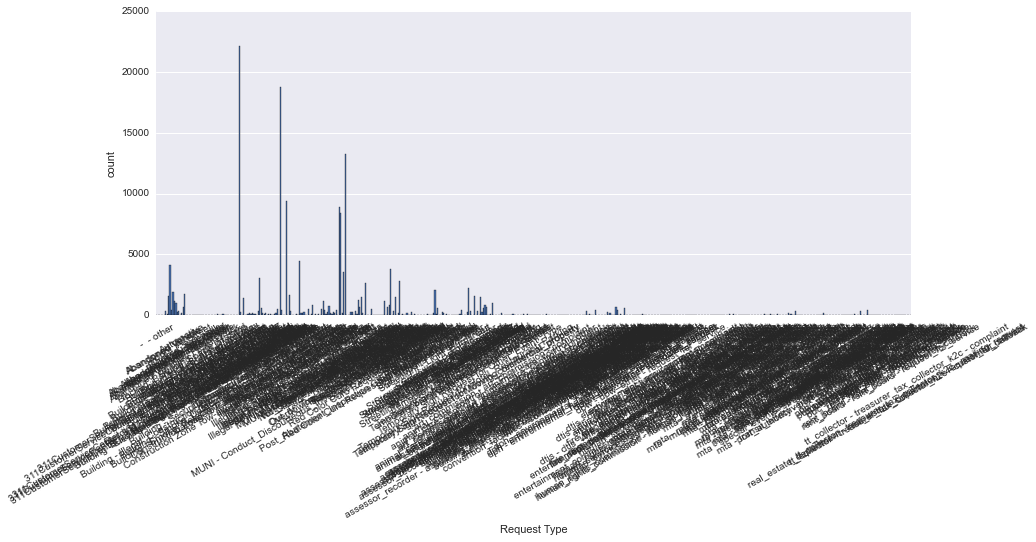

In [8]:
pSF = sns.factorplot("Request Type",data=dfSF2015,aspect=3)
pSF.set_xticklabels(rotation=30)

Now there are a huge amount of complaints, and you can't read the text.  Let's also do the same for the NYC data.

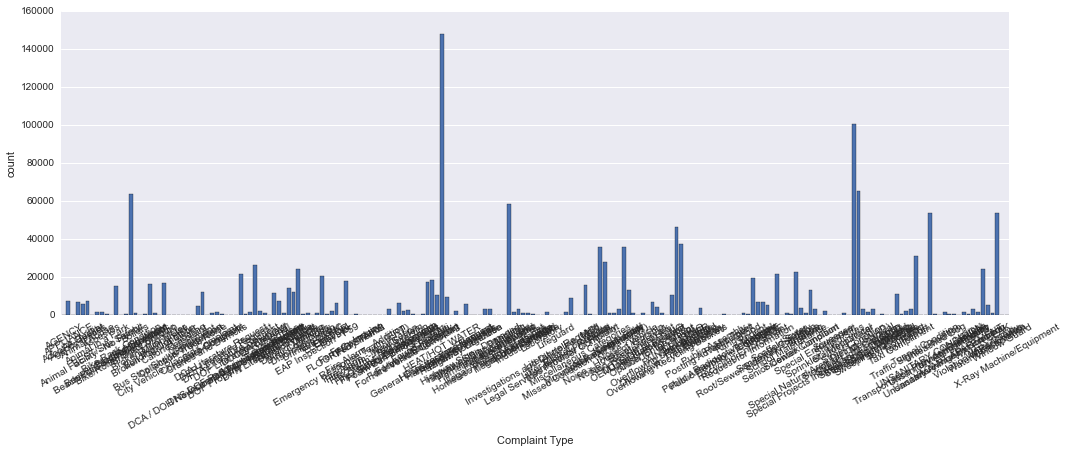

In [9]:
pNYC = sns.factorplot("Complaint Type",data=dfNYC2015,aspect=3)
pNYC.set_xticklabels(rotation=30)

Now, again with New York, there are a large number of complaint types.  Really, there are too many in both datasets in order to display them in plots like this.  So, in order to actually get a good feeling of these complaint types, I want to look at the top 10 of each.  In order to do this, I will create a new column called "Filtered Complaint Type" where if it is outside of the top 10, I will just call it "other".  However, in order to keep the important information, I don't want to overwrite the current data.

In order to do this, I will need to loop over the current column and create a dictionary where my key is the complaint type and the value is the number of times this has occurred.  I can then sort this dictionary on the value and find the top 10 for each city.  I will do this below.

First of all, I will create the dictionaries for each city

In [10]:
dictSF = {}
dictNY = {}

For some reason, I can't pass in the dictionary with the function, so I am creating two functions, one for NY which add to the NY dictionary and one for SF which adds to the SF dictionary.

In [11]:
def Get_Request_Type_NY(text):
    
    if isinstance(text,str):
        if text in dictNY:
            dictNY[text] = dictNY[text]+1
        else:
            dictNY[text] = 1

def Get_Request_Type_SF(text):
    
    if isinstance(text,str):
        if text in dictSF:
            dictSF[text] = dictSF[text]+1
        else:
            dictSF[text] = 1

Now let's run on the SF data.

In [12]:
dfSF2015["Request Type"].apply(Get_Request_Type_SF)

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
163872    None
163873    None
163874    None
163875    None
163876    None
163877    None
163878    None
163879    None
163880    None
163881    None
163882    None
163883    None
163884    None
163885    None
163886    None
163887    None
163888    None
163889    None
163890    None
163891    None
163892    None
163893    None
163894    None
163895    None
163896    None
163897    None
163898    None
163899    None
163900    None
163901    None
Name: Request Type, dtype: object

Let's also run on the NYC data

In [13]:
dfNYC2015["Complaint Type"].apply(Get_Request_Type_NY)

0          None
1          None
2          None
3          None
4          None
5          None
6          None
7          None
8          None
9          None
10         None
11         None
12         None
13         None
14         None
15         None
16         None
17         None
18         None
19         None
20         None
21         None
22         None
23         None
24         None
25         None
26         None
27         None
28         None
29         None
           ... 
1374999    None
1375000    None
1375001    None
1375002    None
1375003    None
1375004    None
1375005    None
1375006    None
1375007    None
1375008    None
1375009    None
1375010    None
1375011    None
1375012    None
1375013    None
1375014    None
1375015    None
1375016    None
1375017    None
1375018    None
1375019    None
1375020    None
1375021    None
1375022    None
1375023    None
1375024    None
1375025    None
1375026    None
1375027    None
1375028    None
Name: Complaint Type, dt

Now let's take a look at the dictionary.

In [14]:
print dictSF

{'Illegal Posting - Posting_Too_Large_in_Size': 1, 'mta - mta_other - complaint': 22, 'real_estate_department - real_estate_department - request_for_service': 1, 'rpd - rpd_other - customer_callback': 13, 'dph - environmental_health - compliment': 6, 'puc - water - customer_callback': 21, 'Damaged Transit_Shelter_Ad_Kiosk': 186, 'Trees': 1, 'human_services_agency - calworks - complaint': 1, 'building_inspection - permit_services - compliment': 1, 'entertainment_commission - entertainment_commission - complaint': 2, 'puc - electric - customer_callback': 6, 'Sign - Loose': 15, 'puc - billing - request_for_service': 5, 'building_inspection - dbi_other - customer_callback': 3, 'Building - Smoke_Detectors_Missing_Broken_Unit_Interior': 3, 'assessor_recorder - assessor_recorder_re_watchdog_program - request_for_service': 1, 'mta - residential_parking_permit - mailing_request': 1, 'Building - Smoke_Detectors_Missing_Broken_Common_Areas': 4, 'Streetlight - Other_Request_Light_Shield': 53, 'dpw

Now this isn't too helpful right now, what I need to do is sort the dictionary and take a look at that.  In order to do that, I need to import the operator module and reverse sort on the dictionary.  This will give me, as output, a list of tuples.

In [15]:
import operator

sorteddict_dfSF = sorted(dictSF.items(), key=operator.itemgetter(1),reverse=True)

Now if I print this, I get the following:

In [16]:
print sorteddict_dfSF

[('Bulky Items', 22116), ('General Cleaning', 18800), ('Offensive Graffiti on Public Property', 13305), ('Hazardous Materials', 9394), ('Not_Offensive Graffiti on Private Property', 8927), ('Not_Offensive Graffiti on Public Property', 8399), ('Illegal Postings - Affixed_Improperly', 4477), ('Abandoned Vehicle - Car4door', 4145), ('Sewage_back_up', 3823), ('Offensive Graffiti on Private Property', 3567), ('Damaged Parking_Meter', 3082), ('Sign - Defaced', 2851), ('Pavement_Defect', 2669), ('Temporary Sign Request for Moving_residential_property', 2249), ('Streetlight - Light_Burnt_Out', 2042), ('Abandoned Vehicle - Other', 1894), ('Blocked_Sidewalk', 1749), ('Illegal Encampment', 1640), ('Toters_left_out_24x7', 1587), ('Abandoned Vehicle - Car2door', 1571), ('Trees - Damaged_Tree', 1539), ('Sidewalk_Defect', 1530), ('Park - Structural_Maintenance', 1475), ('City_garbage_can_overflowing', 1447), ('Park - Neighborhood_Services_Area', 1254), ('SFHA Priority - Emergency', 1197), ('Abandoned

So, there are a large number of entries, which I can get from the length of the list.  I also just want to print the top 10 entries.

In [17]:
print "Number of distinct complaint types in SF =", len(sorteddict_dfSF)

for i in range(10):
    print "%s: %s" % (i+1, sorteddict_dfSF[i])

Number of distinct complaint types in SF = 513
1: ('Bulky Items', 22116)
2: ('General Cleaning', 18800)
3: ('Offensive Graffiti on Public Property', 13305)
4: ('Hazardous Materials', 9394)
5: ('Not_Offensive Graffiti on Private Property', 8927)
6: ('Not_Offensive Graffiti on Public Property', 8399)
7: ('Illegal Postings - Affixed_Improperly', 4477)
8: ('Abandoned Vehicle - Car4door', 4145)
9: ('Sewage_back_up', 3823)
10: ('Offensive Graffiti on Private Property', 3567)


Interestingly, Graffiti appears 4 times in the top 10 for 311 calls in San Francisco!

Now I want to repeat the same analysis but this time for New York.

In [18]:
print dictNY

{'Senior Center Complaint': 235, 'Lead': 1462, 'WATER LEAK': 24229, 'Bus Stop Shelter Placement': 125, 'Sweeping/Inadequate': 208, 'Violation of Park Rules': 1393, 'Found Property': 236, 'Opinion for the Mayor': 6886, 'For Hire Vehicle Complaint': 2422, 'Panhandling': 201, 'VACANT APARTMENT': 1, 'Standpipe - Mechanical': 2, 'Unsanitary Pigeon Condition': 416, 'Consumer Complaint': 12177, 'Other Enforcement': 4339, 'General Construction/Plumbing': 18361, 'Missed Collection (All Materials)': 15539, 'GENERAL': 17235, 'DCA Literature Request': 675, 'Illegal Parking': 58286, 'Fire Alarm - Modification': 91, 'Traffic': 3338, 'Collection Truck Noise': 136, 'Dirty Conditions': 24155, 'PLUMBING': 37104, 'Sprinkler - Mechanical': 3, 'Building Condition': 2, 'Forensic Engineering': 2, 'For Hire Vehicle Report': 250, 'Transportation Provider Complaint': 14, 'Lifeguard': 15, 'Ferry Permit': 34, 'DEP Literature Request': 125, 'Posting Advertisement': 165, 'APPLIANCE': 7333, 'Legal Services Provider 

In [19]:
sorteddict_dfNYC = sorted(dictNY.items(), key=operator.itemgetter(1),reverse=True)

In [20]:
print sorteddict_dfNYC

[('HEAT/HOT WATER', 147761), ('Street Condition', 100591), ('Street Light Condition', 65451), ('Blocked Driveway', 63840), ('Illegal Parking', 58286), ('UNSANITARY CONDITION', 53592), ('Water System', 53491), ('PAINT/PLASTER', 46512), ('PLUMBING', 37104), ('Noise - Street/Sidewalk', 35919), ('Noise', 35532), ('Traffic Signal Condition', 31107), ('Noise - Commercial', 27917), ('DOOR/WINDOW', 26369), ('WATER LEAK', 24229), ('Dirty Conditions', 24155), ('Sewer', 22485), ('DOF Literature Request', 21498), ('Sanitation Condition', 21440), ('ELECTRIC', 20311), ('Rodent', 19623), ('General Construction/Plumbing', 18361), ('FLOORING/STAIRS', 18061), ('GENERAL', 17235), ('Building/Use', 17027), ('Broken Muni Meter', 16084), ('Missed Collection (All Materials)', 15539), ('Benefit Card Replacement', 15322), ('Derelict Vehicle', 14067), ('Noise - Vehicle', 13148), ('Snow', 12993), ('Consumer Complaint', 12177), ('Derelict Vehicles', 12115), ('Damaged Tree', 11608), ('Taxi Complaint', 11279), ('Ove

In [21]:
print "Number of distinct complaint types in NYC =", len(sorteddict_dfNYC)

for i in range(10):
    print "%s: %s" % (i+1, sorteddict_dfNYC[i])

Number of distinct complaint types in NYC = 198
1: ('HEAT/HOT WATER', 147761)
2: ('Street Condition', 100591)
3: ('Street Light Condition', 65451)
4: ('Blocked Driveway', 63840)
5: ('Illegal Parking', 58286)
6: ('UNSANITARY CONDITION', 53592)
7: ('Water System', 53491)
8: ('PAINT/PLASTER', 46512)
9: ('PLUMBING', 37104)
10: ('Noise - Street/Sidewalk', 35919)


So, interstingly, there are absolutely no complaints of graffiti in the top 10 in New York!  The top complaint was also 7 times that of San Francisco.  Of course, they have different populations, so I will look at the popultions according to Wikipedia:

New York City: 8.406 m 
San Francisco: 0.837 m

So, there is a factor of 10 difference in population but only a factor of 7 difference in the top complaint type!  Maybe poeple in San Francisco complain more per capita, or maybe it is simply a difference in the way that the data is aggregated.  For instance, there are only 198 distinct complaint categories in NYC compared to 513 in SF...

Anyroad, now it's time to add that extra column to my dataFrame.  I will follow the same procedure as before and create a function and use the .apply() method to add this to my dataFrame.

In [22]:
def TopComplaintsSF(text):
    
    categories = ["Bulky Items","General Cleaning","Offensive Graffiti on Public Property","Hazardous Materials",
                  "Not_Offensive Graffiti on Private Property","Not_Offensive Graffiti on Public Property",
                  "Illegal Postings - Affixed_Improperly","Abandoned Vehicle - Car4door",
                  "Sewage_back_up","Offensive Graffiti on Private Property"]
    
    if isinstance(text,str):
        if text in categories:
            return text
        else:
            return "Other"
        
def TopComplaintsNY(text):
    
    categories = ["HEAT/HOT WATER","Street Condition","Street Light Condition","Blocked Driveway","Illegal Parking",
                  "UNSANITARY CONDITION","Water System","PAINT/PLASTER","PLUMBING","Noise - Street/Sidewalk"]
    
    if isinstance(text,str):
        if text in categories:
            return text
        else:
            return "Other"

Now I will apply these function to both the SF and NY data

In [23]:
dfNYC2015["Top Complaints"] = dfNYC2015["Complaint Type"].apply(TopComplaintsNY)

In [24]:
dfSF2015["Top Complaints"] = dfSF2015["Request Type"].apply(TopComplaintsSF)

In [25]:
dfNYC2015.head()

Unnamed: 0  Unique Key            Created Date             Closed Date  \
0           0    31438770  09/02/2015 02:12:54 AM  09/02/2015 02:32:37 AM   
1           1    31440770  09/02/2015 02:09:15 AM  09/02/2015 02:25:13 AM   
2           2    31442154  09/02/2015 02:02:47 AM                     NaN   
3           3    31436693  09/02/2015 02:02:29 AM  09/02/2015 02:42:08 AM   
4           4    31440646  09/02/2015 02:01:04 AM                     NaN   

  Agency                              Agency Name           Complaint Type  \
0   NYPD          New York City Police Department  Noise - Street/Sidewalk   
1   NYPD          New York City Police Department          Illegal Parking   
2   NYPD          New York City Police Department  Noise - Street/Sidewalk   
3   NYPD          New York City Police Department          Noise - Vehicle   
4  DOHMH  Department of Health and Mental Hygiene                   Rodent   

                     Descriptor            Location Type Incident Zip  \
0              Loud Music/Party          Street/Sidewalk        10026   
1  Commercial Overnight Parking          Street/Sidewalk        10453   
2              Loud Music/Party          Street/Sidewalk        10031   
3               Car/Truck Music          Street/Sidewalk        10457   
4                Mouse Sighting  3+ Family Apt. Building        10457   

            ...            Road Ramp Bridge Highway Segment Garage Lot Name  \
0           ...                  NaN                    NaN             NaN   
1           ...                  NaN                    NaN             NaN   
2           ...                  NaN                    NaN             NaN   
3           ...                  NaN                    NaN             NaN   
4           ...                  NaN                    NaN             NaN   

  Ferry Direction Ferry Terminal Name   Latitude  Longitude  \
0             NaN                 NaN  40.803807 -73.953942   
1             NaN                 NaN  40.854132 -73.905838   
2             NaN                 NaN  40.822703 -73.949456   
3             NaN                 NaN  40.842755 -73.895051   
4             NaN                 NaN  40.847374 -73.904492   

                                   Location  Year           Top Complaints  
0   (40.80380720203638, -73.95394241225843)  2015  Noise - Street/Sidewalk  
1   (40.85413249609103, -73.90583781268788)  2015          Illegal Parking  
2   (40.82270273023482, -73.94945631295127)  2015  Noise - Street/Sidewalk  
3   (40.84275461199337, -73.89505109358801)  2015                    Other  
4  (40.847373925075836, -73.90449196335827)  2015                    Other  

[5 rows x 56 columns]

In [26]:
dfSF2015.head()

Unnamed: 0  ﻿CaseID                  Opened Closed                 Updated  \
0           0  5053259  09/01/2015 12:40:40 AM    NaN  09/01/2015 01:48:00 AM   
1           1  5053240  09/01/2015 12:16:03 AM    NaN  09/01/2015 12:16:56 AM   
2           2  5053238  09/01/2015 12:15:05 AM    NaN  09/01/2015 12:16:17 AM   
3           3  5053232  09/01/2015 12:11:54 AM    NaN  09/01/2015 12:11:54 AM   
4           4  5053230  09/01/2015 12:10:10 AM    NaN  09/01/2015 12:11:53 AM   

  Status             Responsible Agency                      Category  \
0   Open                  DPW Ops Queue  Street and Sidewalk Cleaning   
1   Open         PUC Streetlights Queue                  Streetlights   
2   Open                  DPW BSM Queue              General Requests   
3   Open                  DPW Ops Queue  Street and Sidewalk Cleaning   
4   Open  PG and E - Streetlights Queue                  Streetlights   

                      Request Type                  Request Details  \
0                 General Cleaning              Other Loose Garbage   
1    Streetlight - Light_Burnt_Out  Light_Burnt_Out on Unknown Pole   
2  dpw - bsm - request_for_service  dpw - bsm - request_for_service   
3                 General Cleaning              Other Loose Garbage   
4    Streetlight - Light_Burnt_Out   Light_Burnt_Out on Wooden Pole   

                                    Address  Supervisor District  \
0   847 HOWARD ST, SAN FRANCISCO, CA, 94103                    6   
1   Intersection of GEARY BLVD and 11TH AVE                    1   
2    Intersection of 14TH ST and MISSION ST                    9   
3  4258 FOLSOM ST, SAN FRANCISCO, CA, 94110                    9   
4    Intersection of 7TH AVE and CLEMENT ST                    1   

      Neighborhood                                  Point    Source  \
0  South of Market   (37.782400819766, -122.403720096779)  Voice In   
1   Inner Richmond  (37.7807685929075, -122.469627013052)  Voice In   
2          Mission  (37.7682735201071, -122.419981393661)   Open311   
3   Bernal Heights   (37.733733034976, -122.413866639816)   Open311   
4   Inner Richmond  (37.7828909363383, -122.465492275341)  Voice In   

                                           Media URL  Year    Top Complaints  
0                                                NaN  2015  General Cleaning  
1                                                NaN  2015             Other  
2  http://mobile311.sfgov.org/media/san_francisco...  2015             Other  
3  http://mobile311.sfgov.org/media/san_francisco...  2015  General Cleaning  
4                                                NaN  2015             Other

Now I want to look at the plot of the top complaints.  I will do this first for San Francisco and then for New York and will use the seaborn factorplot.

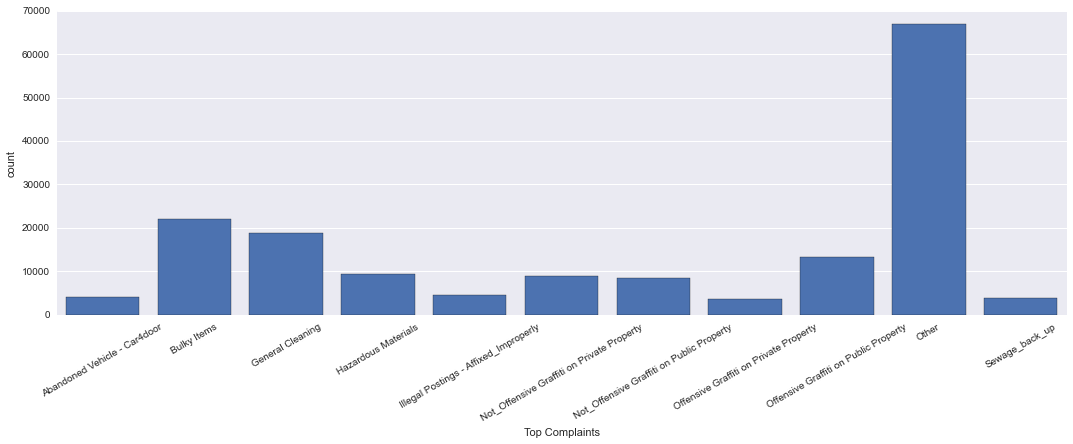

In [27]:
pSF2 = sns.factorplot("Top Complaints",data=dfSF2015,aspect=3)
pSF2.set_xticklabels(rotation=30)

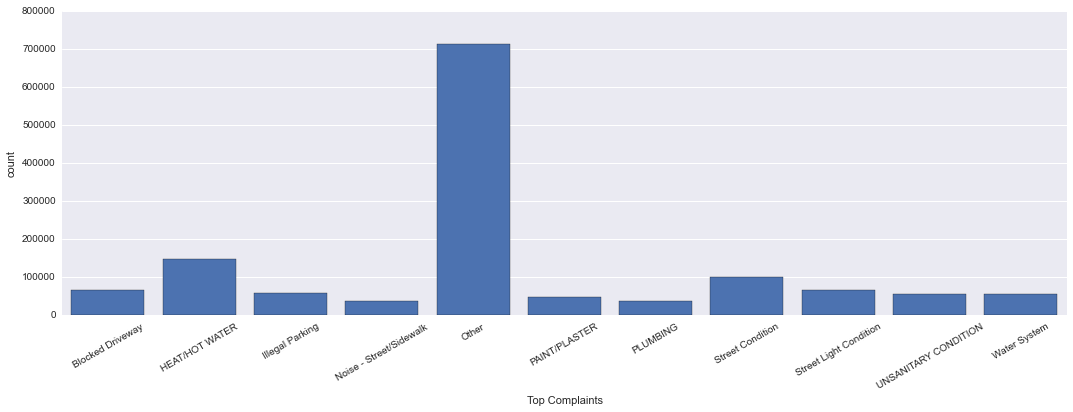

In [28]:
pNYC2 = sns.factorplot("Top Complaints",data=dfNYC2015,aspect=3)
pNYC2.set_xticklabels(rotation=30)

Now, I can look at the complaints in New York as a function of Borough, which I will apply as a hue to the factorplot. 

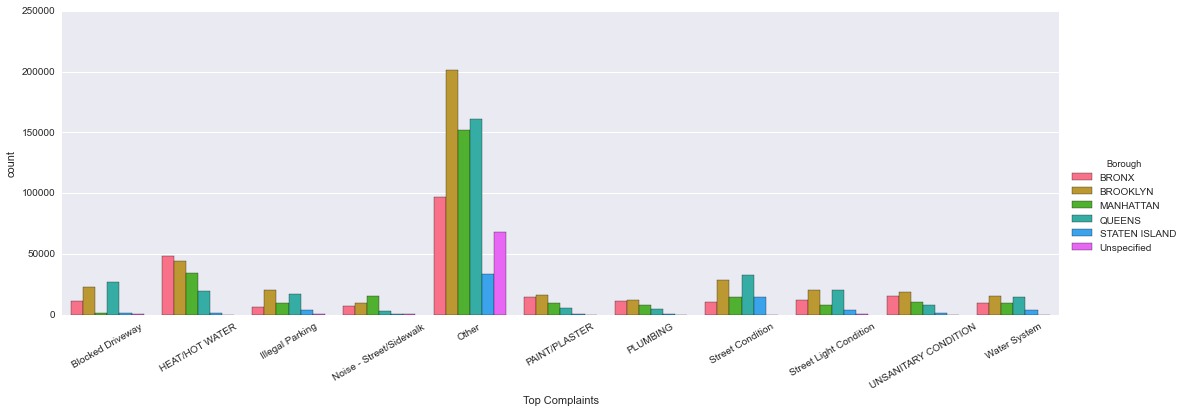

In [29]:
pNYC3 = sns.factorplot("Top Complaints",data=dfNYC2015,hue="Borough",aspect=3)
pNYC3.set_xticklabels(rotation=30)

This has some interesting information.  Note that the "HEAT/HOT WATER" category has more complaints from the Bronx than any other borough, and is second in other in-home complaints such as "PLUMBING" and "UNSANITARY CONDITION".  However, for other complaints, such as "Illegal Parking", it is way down there.

I will try and do the same thing for San Frencisco although it is split into neighbourhoods, so it will be a lot more congested plot as there are more neighbourhoods than there are boroughs in New York...

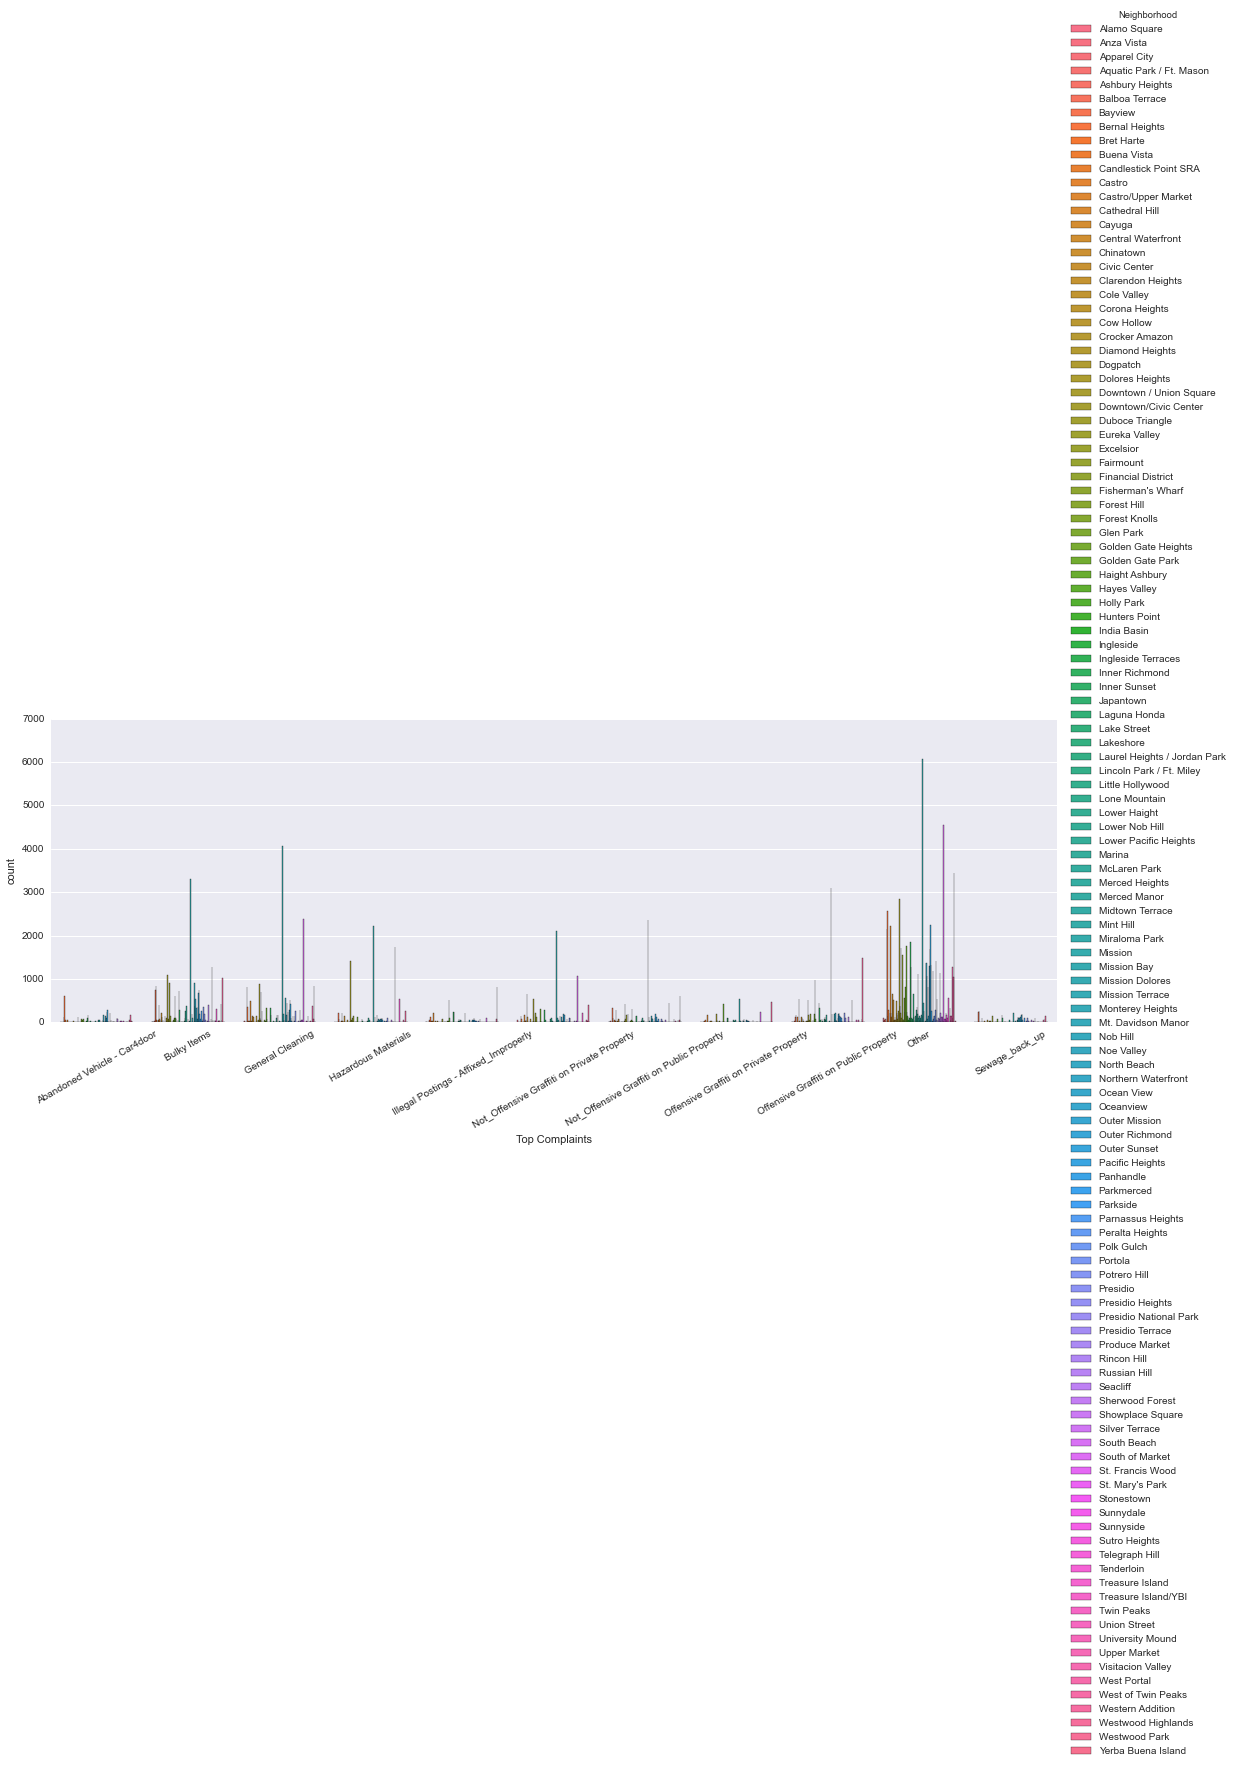

In [30]:
pSF3 = sns.factorplot("Top Complaints",data=dfSF2015,hue="Neighborhood",aspect=3)
pSF3.set_xticklabels(rotation=30)

Now the plot is way too complicated to actually extract much information out of, however, it is obvious that for some categories, such as "Bulky Items" and "Hazardous Materials", that there are some very dominant spikes.  It would be interesting to know what these are.  Again, I can use a dictionary to calculate this...

One thing I want to be able to do is to put the latitude and longitude points on a map.  I have lookws into a tutorial for this and I foind the following useful webpage:

http://introtopython.org/visualization_earthquakes.html

I will create a new notebook and try and recreate the map they found.

Unfortuantely, the python package they use is quite low resolution.  By playing around, this is the best map of NYC that I could get...

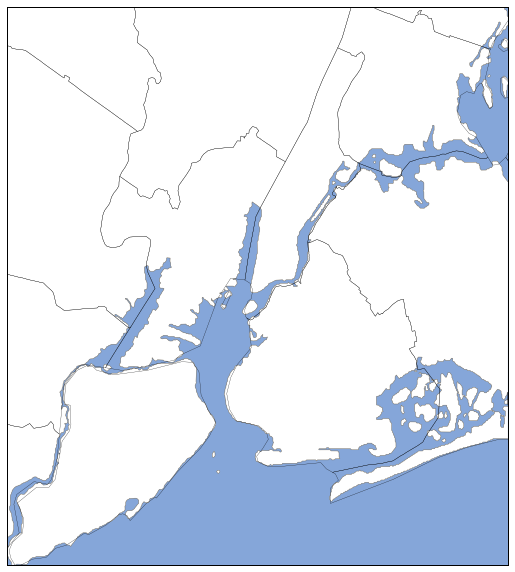

In [31]:
from mpl_toolkits.basemap import Basemap

rcParams['figure.figsize'] = (20,10)

m = Basemap(projection='merc',llcrnrlat=40.4971,urcrnrlat=40.9125,\
            llcrnrlon=-74.2580, urcrnrlon=-73.7663, lat_ts=40.5,resolution='f',
           area_thresh = 0.01)
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='white',lake_color='#85A6D9')
m.drawcounties(linewidth=0.25)
plt.figure(figsize=(20,10))
plt.show()

As you can see, it isn't the best resolution.  Therefore, I thought about just plotting the points themselves.  I can do this by either using pandas.plot or I can do this using a matplotlib scatterplot.  The code below is for doing this with matplotlib.plot. 

'''
pd.options.display.mpl_style = 'default' #Better Styling  
new_style = {'grid': False} #Remove grid  
matplotlib.rc('axes', **new_style)   
rcParams['figure.figsize'] = (17.5, 15) #Size of figure  
rcParams['figure.dpi'] = 250



P=dfNYC2015.plot(kind='scatter', x="Longitude", y='Latitude',color='white',xlim=(-74.26,-73.77),ylim=(40.49, 40.91),s=.02,alpha=.6)
P.set_axis_bgcolor('black') #Background Color
'''

The code below here plots the top 3 complaints from New York City.  I do this first on a "white" background and then on a black background.  I think that the black background looks more stunning.

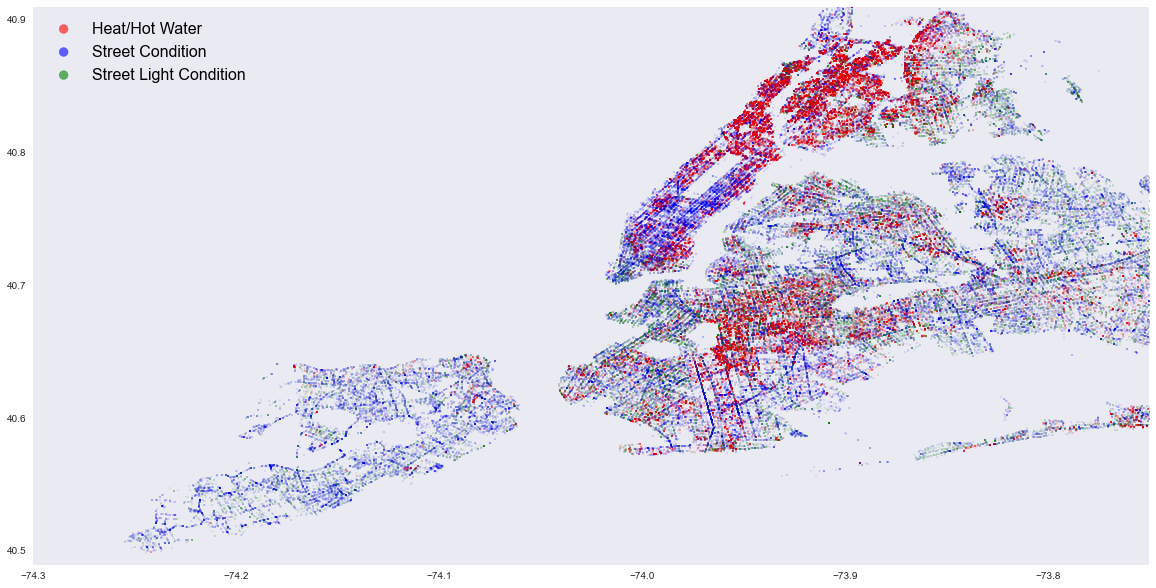

In [32]:
fig = plt.figure()
#ax1 = fig.add_subplot(111)
rcParams['figure.figsize'] = (15, 8) #Size of figure
rcParams['axes.grid'] = ("False") #Size of figure
rcParams['text.color'] = ("black") #Size of figure 

x1 = dfNYC2015[dfNYC2015["Top Complaints"] == 'HEAT/HOT WATER']["Longitude"]
x2 = dfNYC2015[dfNYC2015["Top Complaints"] == 'Street Condition']["Longitude"]
x3 = dfNYC2015[dfNYC2015["Top Complaints"] == 'Street Light Condition']["Longitude"]
y1 = dfNYC2015[dfNYC2015["Top Complaints"] == 'HEAT/HOT WATER']["Latitude"]
y2 = dfNYC2015[dfNYC2015["Top Complaints"] == 'Street Condition']["Latitude"]
y3 = dfNYC2015[dfNYC2015["Top Complaints"] == 'Street Light Condition']["Latitude"]

xmin = -74.30
xmax = -73.75
ymin = 40.49
ymax = 40.91

ax1 = plt.scatter(x=x1, y=y1,color='red', marker="o", label='Heat/Hot Water',s=.2,alpha=.6)
ax2 = plt.scatter(x=x2, y=y2,color='blue', marker="o", label='Street Condition',s=.2,alpha=.6)
ax3 = plt.scatter(x=x3, y=y3,color='green', marker="o", label='Street Light Condition',s=.2,alpha=.6)
plt.legend((ax1, ax2, ax3),('Heat/Hot Water', 'Street Condition', 'Street Light Condition'),markerscale=20.,
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=16)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
#plt.legend(loc='upper left',fontsize=16,numpoints=1)
plt.show();

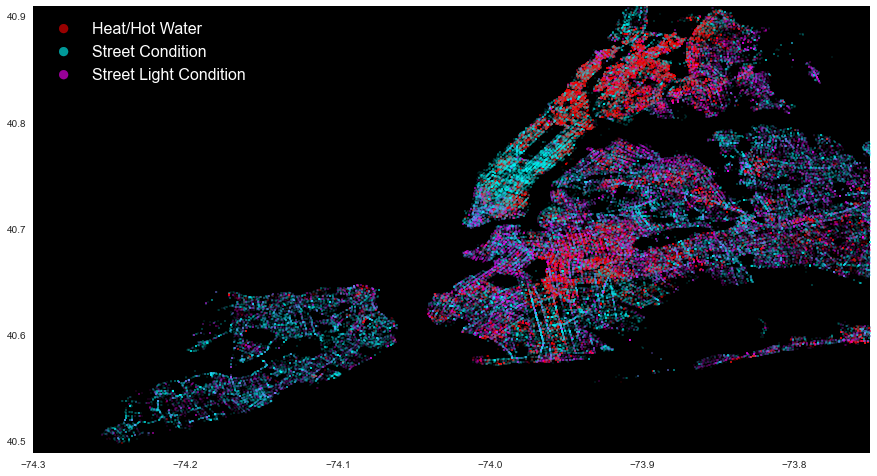

In [33]:
fig.patch.set_facecolor('black')

rcParams['text.color'] = ("white") #Size of figure 

plt.subplot('111', axisbg='black')

ax1 = plt.scatter(x=x1, y=y1,color='red', marker="o", label='Heat/Hot Water',s=.2,alpha=.6)
ax2 = plt.scatter(x=x2, y=y2,color='cyan', marker="o", label='Street Condition',s=.2,alpha=.6)
ax3 = plt.scatter(x=x3, y=y3,color='magenta', marker="o", label='Street Light Condition',s=.2,alpha=.6)
plt.legend((ax1, ax2, ax3),('Heat/Hot Water', 'Street Condition', 'Street Light Condition'),markerscale=20.,
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=16)
    
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
#plt.set_axis_bgcolor('black') #Background Color
#plt.legend(loc='upper left',fontsize=16,numpoints=1)

plt.savefig("test.png")   
#plt.show();


Now I want to do the same for San Francisco.  Firstly, I have to create a "Latitude" and "Longitude" column in my dataFrame.  The reason for this is that 

In [34]:
print dfSF2015[dfSF2015["Top Complaints"] == 'General Cleaning']["Point"][0]

(37.782400819766, -122.403720096779)


In [35]:
import re

stringtomatch = "(37.782400819766, -122.403720096779)"

Lat = re.search(r'(\d+\.\d+)',stringtomatch)
Long = re.search(r'(-\d+\.\d+)',stringtomatch)

In [36]:
print Lat.group()
print Long.group()

37.782400819766
-122.403720096779


In [37]:
def GetLatitudeSF(text):
    
    if isinstance(text,str):
        Lat = re.search(r'(\d+\.\d+)',text)
        return float(Lat.group())
    return numpy.nan

def GetLongitudeSF(text):
    
    if isinstance(text,str):
        Long = re.search(r'(-\d+\.\d+)',text)
        return float(Long.group())
    return numpy.nan

In [38]:
dfSF2015["Latitude"] = dfSF2015["Point"].apply(GetLatitudeSF)

In [39]:
dfSF2015["Longitude"] = dfSF2015["Point"].apply(GetLongitudeSF)

In [40]:
dfSF2015.head()

Unnamed: 0  ﻿CaseID                  Opened Closed                 Updated  \
0           0  5053259  09/01/2015 12:40:40 AM    NaN  09/01/2015 01:48:00 AM   
1           1  5053240  09/01/2015 12:16:03 AM    NaN  09/01/2015 12:16:56 AM   
2           2  5053238  09/01/2015 12:15:05 AM    NaN  09/01/2015 12:16:17 AM   
3           3  5053232  09/01/2015 12:11:54 AM    NaN  09/01/2015 12:11:54 AM   
4           4  5053230  09/01/2015 12:10:10 AM    NaN  09/01/2015 12:11:53 AM   

  Status             Responsible Agency                      Category  \
0   Open                  DPW Ops Queue  Street and Sidewalk Cleaning   
1   Open         PUC Streetlights Queue                  Streetlights   
2   Open                  DPW BSM Queue              General Requests   
3   Open                  DPW Ops Queue  Street and Sidewalk Cleaning   
4   Open  PG and E - Streetlights Queue                  Streetlights   

                      Request Type                  Request Details  \
0                 General Cleaning              Other Loose Garbage   
1    Streetlight - Light_Burnt_Out  Light_Burnt_Out on Unknown Pole   
2  dpw - bsm - request_for_service  dpw - bsm - request_for_service   
3                 General Cleaning              Other Loose Garbage   
4    Streetlight - Light_Burnt_Out   Light_Burnt_Out on Wooden Pole   

                                    Address  Supervisor District  \
0   847 HOWARD ST, SAN FRANCISCO, CA, 94103                    6   
1   Intersection of GEARY BLVD and 11TH AVE                    1   
2    Intersection of 14TH ST and MISSION ST                    9   
3  4258 FOLSOM ST, SAN FRANCISCO, CA, 94110                    9   
4    Intersection of 7TH AVE and CLEMENT ST                    1   

      Neighborhood                                  Point    Source  \
0  South of Market   (37.782400819766, -122.403720096779)  Voice In   
1   Inner Richmond  (37.7807685929075, -122.469627013052)  Voice In   
2          Mission  (37.7682735201071, -122.419981393661)   Open311   
3   Bernal Heights   (37.733733034976, -122.413866639816)   Open311   
4   Inner Richmond  (37.7828909363383, -122.465492275341)  Voice In   

                                           Media URL  Year    Top Complaints  \
0                                                NaN  2015  General Cleaning   
1                                                NaN  2015             Other   
2  http://mobile311.sfgov.org/media/san_francisco...  2015             Other   
3  http://mobile311.sfgov.org/media/san_francisco...  2015  General Cleaning   
4                                                NaN  2015             Other   

    Latitude   Longitude  
0  37.782401 -122.403720  
1  37.780769 -122.469627  
2  37.768274 -122.419981  
3  37.733733 -122.413867  
4  37.782891 -122.465492

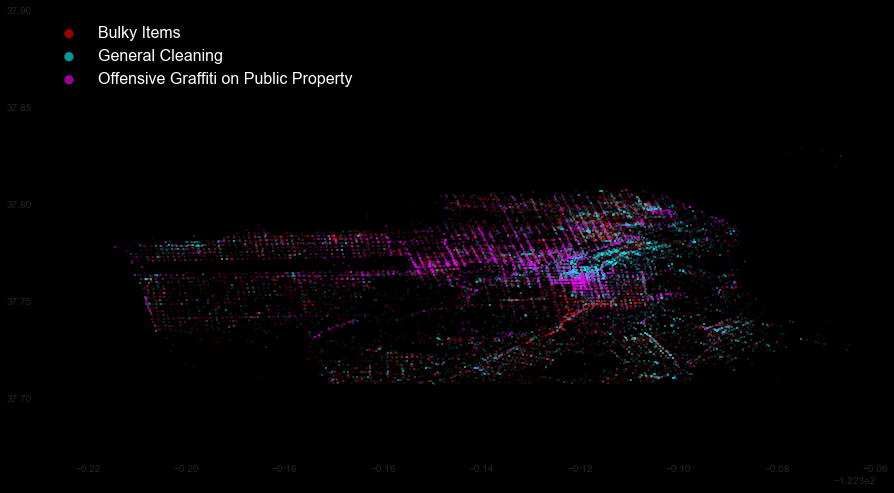

In [41]:
fig = plt.figure()
#ax1 = fig.add_subplot(111)
rcParams['figure.figsize'] = (15, 8) #Size of figure  

fig.patch.set_facecolor('black')
rcParams['text.color'] = ("white") #Text colour 
plt.subplot('111', axisbg='black')

x1SF = dfSF2015[dfSF2015["Top Complaints"] == 'Bulky Items']["Longitude"]
x2SF = dfSF2015[dfSF2015["Top Complaints"] == 'General Cleaning']["Longitude"]
x3SF = dfSF2015[dfSF2015["Top Complaints"] == 'Offensive Graffiti on Public Property']["Longitude"]
y1SF = dfSF2015[dfSF2015["Top Complaints"] == 'Bulky Items']["Latitude"]
y2SF = dfSF2015[dfSF2015["Top Complaints"] == 'General Cleaning']["Latitude"]
y3SF = dfSF2015[dfSF2015["Top Complaints"] == 'Offensive Graffiti on Public Property']["Latitude"]

xmin = -122.53
xmax = -122.36
ymin = 37.67
ymax = 37.9

ax1SF = plt.scatter(x=x1SF, y=y1SF,color='red', marker="o", label='Bulky Items',s=.2,alpha=.6)
ax2SF = plt.scatter(x=x2SF, y=y2SF,color='cyan', marker="o", label='General Cleaning',s=.2,alpha=.6)
ax3SF = plt.scatter(x=x3SF, y=y3SF,color='magenta', marker="o", label='Offensive Graffiti on Public Property',s=.2,alpha=.6)
plt.legend((ax1SF, ax2SF, ax3SF),('Bulky Items', 'General Cleaning', 'Offensive Graffiti on Public Property'),markerscale=20.,
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=16)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.show();

So this is the plot for San Francisco.  It isn't as impressive as New York but that is probably because it isn't as big.

Now, both oth these plots may look better if they are overlaid on top of a map of the respective city.  I maybe can download a map and then use it as a background for this purpose.  

# Downloading maps

In order to download a map, I used the following webpage:

http://staticmapmaker.com/mapbox/

I needed to give it some long/lat co-ordinates and a zoom level (11).  I can then import that image and use it as a backdrop to my canvas.  I think that it looks pretty good.

NYC: https://api.mapbox.com/v4/mapbox.light/-74.025,40.7,10/600x400.png256?access_token=pk.eyJ1IjoibWFjbGFtb250IiwiYSI6ImFhYTM2Y2I5YWZhYmQzMmZiNWIyNmE3MDFkMzU0MmU4In0.Z9wtLULCtzetQQs0lZodbA

SF: https://api.mapbox.com/v4/mapbox.streets-basic/-122.44,37.76,12/600x400.png256?access_token=pk.eyJ1IjoibWFjbGFtb250IiwiYSI6ImFhYTM2Y2I5YWZhYmQzMmZiNWIyNmE3MDFkMzU0MmU4In0.Z9wtLULCtzetQQs0lZodbA

In [42]:
from scipy.misc import imread

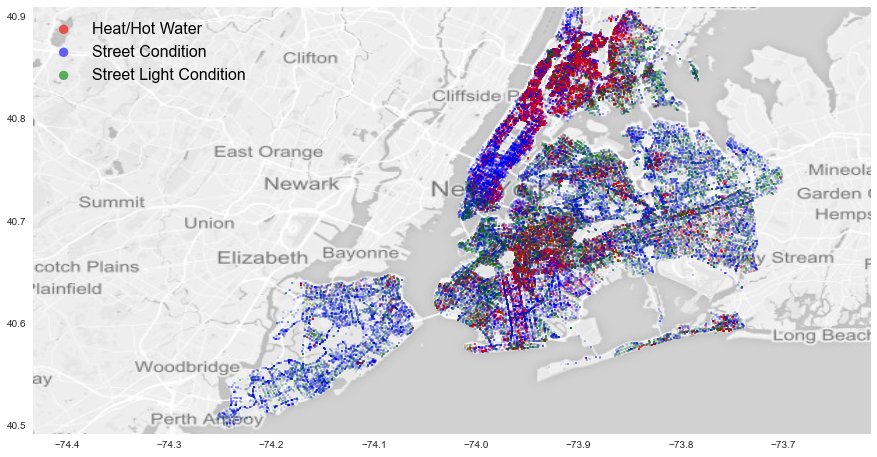

In [43]:
img = imread("./NYC_light_600x400.jpg")
rcParams['text.color'] = ("black") #Text colour 
rcParams['figure.figsize'] = (15, 8) #Size of figure  

xmin = -74.433
xmax = -73.615
ymin = 40.493
ymax = 40.91

ax1 = plt.scatter(x=x1, y=y1,color='red', marker="o", label='Heat/Hot Water',s=.2,alpha=.6,zorder=1)
ax2 = plt.scatter(x=x2, y=y2,color='blue', marker="o", label='Street Condition',s=.2,alpha=.6,zorder=1)
ax3 = plt.scatter(x=x3, y=y3,color='green', marker="o", label='Street Light Condition',s=.2,alpha=.6,zorder=1)
plt.legend((ax1, ax2, ax3),('Heat/Hot Water', 'Street Condition', 'Street Light Condition'),markerscale=20.,
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=16)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.imshow(img,zorder=0,extent=[xmin,xmax,ymin,ymax])
#plt.legend(loc='upper left',fontsize=16,numpoints=1)
plt.show();

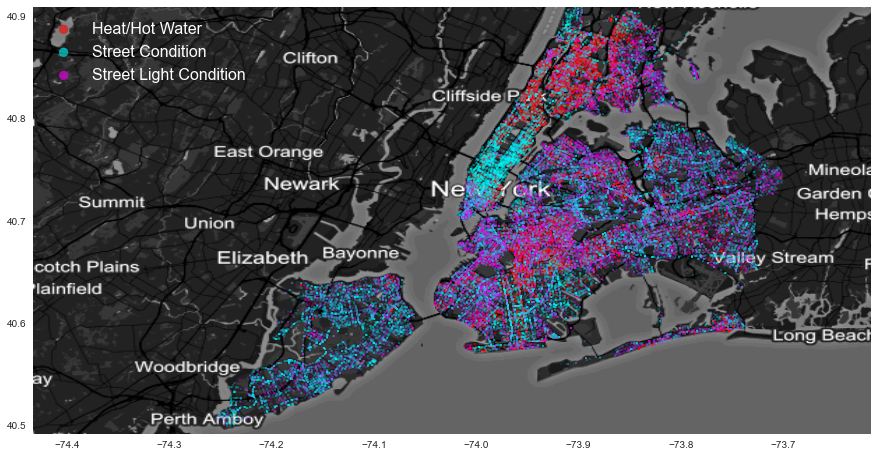

In [44]:
img = imread("./NYC_light_600x400.png")
rcParams['text.color'] = ("white") #Text colour 
rcParams['figure.figsize'] = (15, 8) #Size of figure  

xmin = -74.433
xmax = -73.615
ymin = 40.493
ymax = 40.91

ax1 = plt.scatter(x=x1, y=y1,color='red', marker="o", label='Heat/Hot Water',s=.2,alpha=.6,zorder=1)
ax2 = plt.scatter(x=x2, y=y2,color='cyan', marker="o", label='Street Condition',s=.2,alpha=.6,zorder=1)
ax3 = plt.scatter(x=x3, y=y3,color='magenta', marker="o", label='Street Light Condition',s=.2,alpha=.6,zorder=1)
plt.legend((ax1, ax2, ax3),('Heat/Hot Water', 'Street Condition', 'Street Light Condition'),markerscale=20.,
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=16)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.imshow(img,zorder=0,extent=[xmin,xmax,ymin,ymax])
#plt.legend(loc='upper left',fontsize=16,numpoints=1)
plt.savefig("NYC_dark.png")
#plt.show();

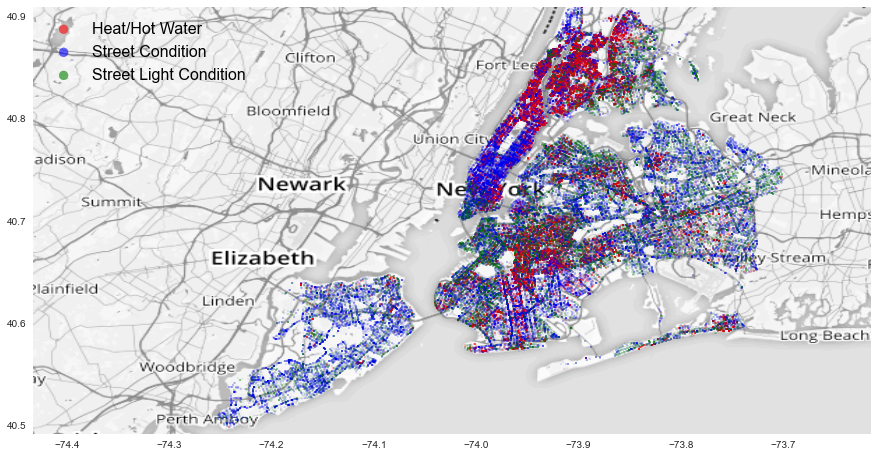

In [45]:
img = imread("./NYC_dark_600x400.png")
rcParams['text.color'] = ("black") #Text colour 
rcParams['figure.figsize'] = (15, 8) #Size of figure  

xmin = -74.433
xmax = -73.615
ymin = 40.493
ymax = 40.91

ax1 = plt.scatter(x=x1, y=y1,color='red', marker="o", label='Heat/Hot Water',s=.2,alpha=.6,zorder=1)
ax2 = plt.scatter(x=x2, y=y2,color='blue', marker="o", label='Street Condition',s=.2,alpha=.6,zorder=1)
ax3 = plt.scatter(x=x3, y=y3,color='green', marker="o", label='Street Light Condition',s=.2,alpha=.6,zorder=1)
plt.legend((ax1, ax2, ax3),('Heat/Hot Water', 'Street Condition', 'Street Light Condition'),markerscale=20.,
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=16)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.imshow(img,zorder=0,extent=[xmin,xmax,ymin,ymax])
#plt.legend(loc='upper left',fontsize=16,numpoints=1)
plt.savefig("NYC_test.png")
#plt.show();

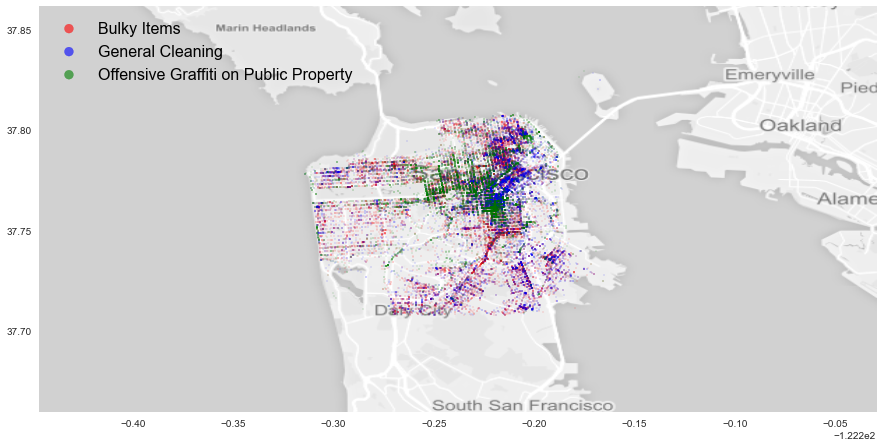

In [46]:
img = imread("./SF_light_600x400.png")
rcParams['text.color'] = ("black") #Text colour 
rcParams['figure.figsize'] = (15, 8) #Size of figure  

xmin = -122.647
xmax = -122.23
ymin = 37.66
ymax = 37.862

ax1SF = plt.scatter(x=x1SF, y=y1SF,color='red', marker="o", label='Bulky Items',s=.2,alpha=.6)
ax2SF = plt.scatter(x=x2SF, y=y2SF,color='blue', marker="o", label='General Cleaning',s=.2,alpha=.6)
ax3SF = plt.scatter(x=x3SF, y=y3SF,color='green', marker="o", label='Offensive Graffiti on Public Property',s=.2,alpha=.6)
plt.legend((ax1SF, ax2SF, ax3SF),('Bulky Items', 'General Cleaning', 'Offensive Graffiti on Public Property'),markerscale=20.,
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=16)
plt.imshow(img,zorder=0,extent=[xmin,xmax,ymin,ymax])
#plt.legend(loc='upper left',fontsize=16,numpoints=1)
plt.show();

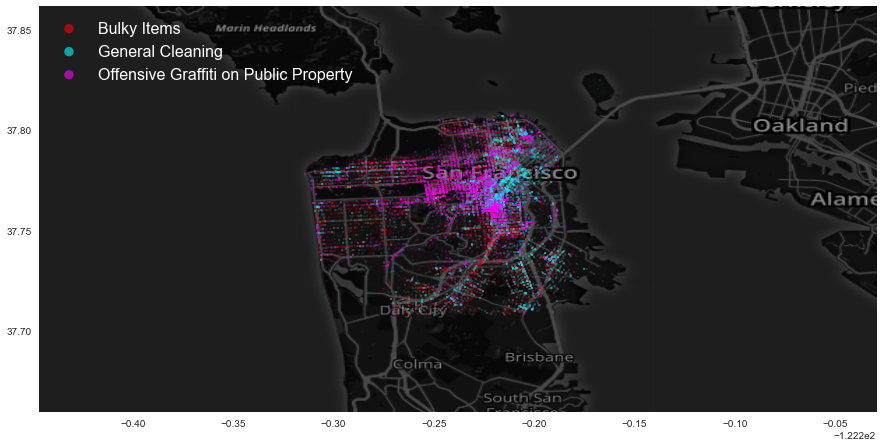

In [47]:
img = imread("./SF_dark_600x400.png")
rcParams['text.color'] = ("white") #Text colour 
rcParams['figure.figsize'] = (15, 8) #Size of figure  

xmin = -122.647
xmax = -122.23
ymin = 37.66
ymax = 37.862

ax1SF = plt.scatter(x=x1SF, y=y1SF,color='red', marker="o", label='Bulky Items',s=.2,alpha=.6)
ax2SF = plt.scatter(x=x2SF, y=y2SF,color='cyan', marker="o", label='General Cleaning',s=.2,alpha=.6)
ax3SF = plt.scatter(x=x3SF, y=y3SF,color='magenta', marker="o", label='Offensive Graffiti on Public Property',s=.2,alpha=.6)
plt.legend((ax1SF, ax2SF, ax3SF),('Bulky Items', 'General Cleaning', 'Offensive Graffiti on Public Property'),markerscale=20.,
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=16)
plt.imshow(img,zorder=0,extent=[xmin,xmax,ymin,ymax])
#plt.legend(loc='upper left',fontsize=16,numpoints=1)
#plt.show();
plt.savefig("SF_dark.png")

In [48]:
dfNYC2015.head()

Unnamed: 0  Unique Key            Created Date             Closed Date  \
0           0    31438770  09/02/2015 02:12:54 AM  09/02/2015 02:32:37 AM   
1           1    31440770  09/02/2015 02:09:15 AM  09/02/2015 02:25:13 AM   
2           2    31442154  09/02/2015 02:02:47 AM                     NaN   
3           3    31436693  09/02/2015 02:02:29 AM  09/02/2015 02:42:08 AM   
4           4    31440646  09/02/2015 02:01:04 AM                     NaN   

  Agency                              Agency Name           Complaint Type  \
0   NYPD          New York City Police Department  Noise - Street/Sidewalk   
1   NYPD          New York City Police Department          Illegal Parking   
2   NYPD          New York City Police Department  Noise - Street/Sidewalk   
3   NYPD          New York City Police Department          Noise - Vehicle   
4  DOHMH  Department of Health and Mental Hygiene                   Rodent   

                     Descriptor            Location Type Incident Zip  \
0              Loud Music/Party          Street/Sidewalk        10026   
1  Commercial Overnight Parking          Street/Sidewalk        10453   
2              Loud Music/Party          Street/Sidewalk        10031   
3               Car/Truck Music          Street/Sidewalk        10457   
4                Mouse Sighting  3+ Family Apt. Building        10457   

            ...            Road Ramp Bridge Highway Segment Garage Lot Name  \
0           ...                  NaN                    NaN             NaN   
1           ...                  NaN                    NaN             NaN   
2           ...                  NaN                    NaN             NaN   
3           ...                  NaN                    NaN             NaN   
4           ...                  NaN                    NaN             NaN   

  Ferry Direction Ferry Terminal Name   Latitude  Longitude  \
0             NaN                 NaN  40.803807 -73.953942   
1             NaN                 NaN  40.854132 -73.905838   
2             NaN                 NaN  40.822703 -73.949456   
3             NaN                 NaN  40.842755 -73.895051   
4             NaN                 NaN  40.847374 -73.904492   

                                   Location  Year           Top Complaints  
0   (40.80380720203638, -73.95394241225843)  2015  Noise - Street/Sidewalk  
1   (40.85413249609103, -73.90583781268788)  2015          Illegal Parking  
2   (40.82270273023482, -73.94945631295127)  2015  Noise - Street/Sidewalk  
3   (40.84275461199337, -73.89505109358801)  2015                    Other  
4  (40.847373925075836, -73.90449196335827)  2015                    Other  

[5 rows x 56 columns]

Now that I have the maps issue sorted, I can start to look at other things.  For instance, for the different "Complaint Types" categories in the NYC dataframe, there are different descriptors.  For now, I am interested in plotting the different types of rodent categories.  I can do this like this:

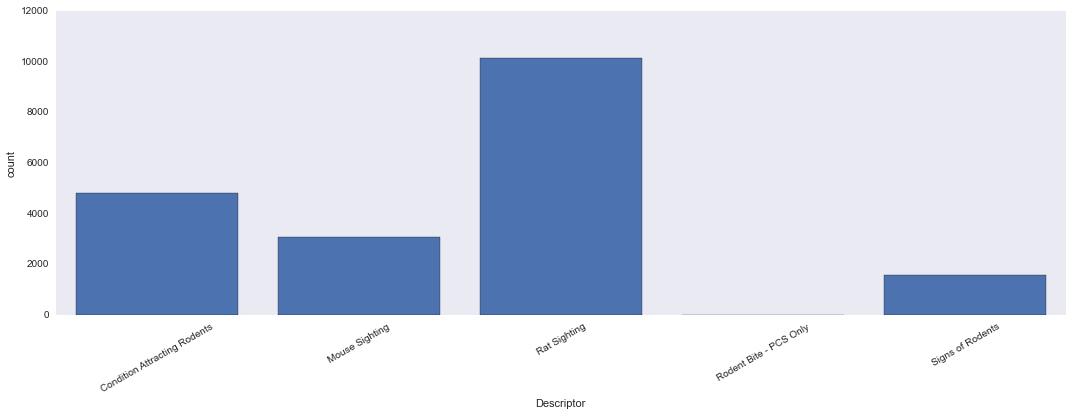

In [52]:
pNYC4 = sns.factorplot("Descriptor",data=dfNYC2015[dfNYC2015["Complaint Type"] == "Rodent"],aspect=3)
pNYC4.set_xticklabels(rotation=30)

So, there were more sightings of rats than mice and lots of conditions attracting Rodents!  Now, that is perhaps not too surprising considering this is New York City which is famous for its rats after all!

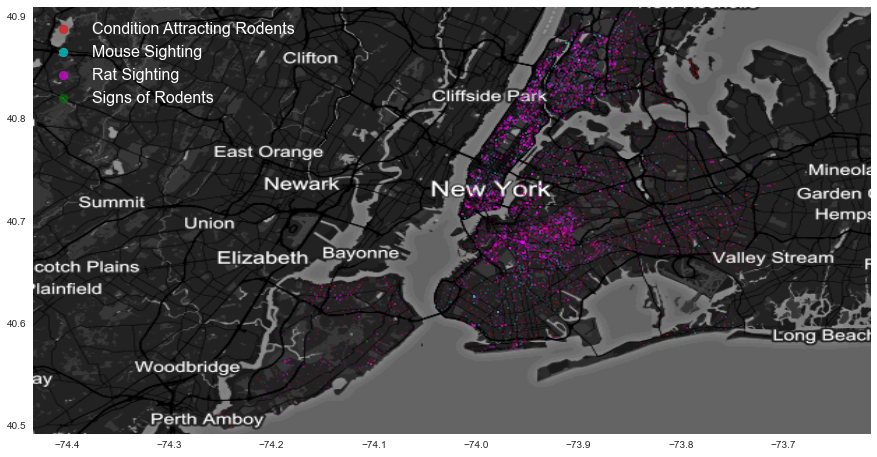

In [55]:
fig = plt.figure()
#ax1 = fig.add_subplot(111)

img = imread("./NYC_light_600x400.png")
rcParams['text.color'] = ("white") #Text colour 
rcParams['figure.figsize'] = (15, 8) #Size of figure  
rcParams['axes.grid'] = ("False") #Size of figure

xRod1 = dfNYC2015[dfNYC2015["Descriptor"] == 'Condition Attracting Rodents']["Longitude"]
xRod2 = dfNYC2015[dfNYC2015["Descriptor"] == 'Mouse Sighting']["Longitude"]
xRod3 = dfNYC2015[dfNYC2015["Descriptor"] == 'Rat Sighting']["Longitude"]
xRod4 = dfNYC2015[dfNYC2015["Descriptor"] == 'Signs of Rodents']["Longitude"]
yRod1 = dfNYC2015[dfNYC2015["Descriptor"] == 'Condition Attracting Rodents']["Latitude"]
yRod2 = dfNYC2015[dfNYC2015["Descriptor"] == 'Mouse Sighting']["Latitude"]
yRod3 = dfNYC2015[dfNYC2015["Descriptor"] == 'Rat Sighting']["Latitude"]
yRod4 = dfNYC2015[dfNYC2015["Descriptor"] == 'Signs of Rodents']["Latitude"]

xmin = -74.433
xmax = -73.615
ymin = 40.493
ymax = 40.91

ax1 = plt.scatter(x=xRod1, y=yRod1,color='red', marker="o",s=.2,alpha=.6)
ax2 = plt.scatter(x=xRod2, y=yRod2,color='cyan', marker="o",s=.2,alpha=.6)
ax3 = plt.scatter(x=xRod3, y=yRod3,color='magenta', marker="o",s=.2,alpha=.6)
ax4 = plt.scatter(x=xRod4, y=yRod4,color='green', marker="o",s=.2,alpha=.6)
plt.legend((ax1, ax2, ax3,ax4),('Condition Attracting Rodents', 'Mouse Sighting', 'Rat Sighting','Signs of Rodents'),markerscale=20.,
           scatterpoints=1,
           loc='upper left',
           ncol=1,
           fontsize=16)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.imshow(img,zorder=0,extent=[xmin,xmax,ymin,ymax])
plt.show();

So it looks like the majority of rat sightings appeared in Manhattan, Queens and the Bronx, not too many appeared in Brooklyn or Staten Island!